7.4.1 梯度下降的问题

让我们考虑一个输入和输出分别为二维向量$\boldsymbol{x} = [x_1, x_2]^\top$和标量的目标函数$f(\boldsymbol{x})=0.1x_1^2+2x_2^2$。与7.2节中不同，这里将$x_1^2$系数从$1$减小到了$0.1$。下面实现基于这个目标函数的梯度下降，并演示使用学习率为$0.4$时自变量的迭代轨迹。


epoch 20, x1 -0.943467, x2 -0.000073


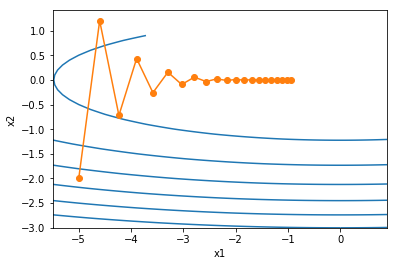

In [1]:
%matplotlib inline
import numpy as np
import time
import sys
import tensorflow as tf
sys.path.append("..") 
import d2lzh_tensorflow2 as d2l

eta = 0.4 # 学习率

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1 -0.387814, x2 -1673.365109


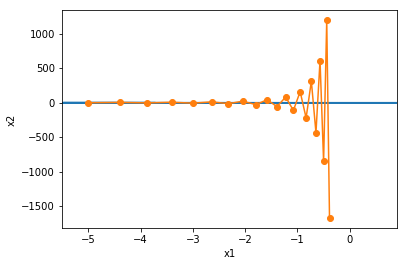

In [2]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

## 7.4.2 动量法

动量法的提出是为了解决梯度下降的上述问题。由于小批量随机梯度下降比梯度下降更为广义，本章后续讨论将沿用7.3节（小批量随机梯度下降）中时间步$t$的小批量随机梯度$\boldsymbol{g}_t$的定义。设时间步$t$的自变量为$\boldsymbol{x}_t$，学习率为$\eta_t$。
在时间步$0$，动量法创建速度变量$\boldsymbol{v}_0$，并将其元素初始化成0。在时间步$t>0$，动量法对每次迭代的步骤做如下修改：

$$
\begin{aligned}
\boldsymbol{v}_t &\leftarrow \gamma \boldsymbol{v}_{t-1} + \eta_t \boldsymbol{g}_t, \\
\boldsymbol{x}_t &\leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{v}_t,
\end{aligned}
$$

epoch 20, x1 -0.062843, x2 0.001202


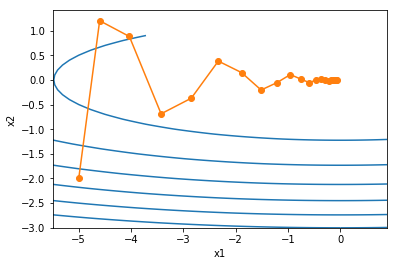

In [3]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

## 7.4.3 从零开始实现

In [3]:
features, labels = d2l.get_data_ch7()

def init_momentum_states():
    v_w = tf.zeros((features.shape[1],1))
    v_b = tf.zeros(1)
    return (v_w, v_b)
def sgd_momentum(params, states, hyperparams,grads):
    i=0
    for p,v in zip(params, states):
        v=hyperparams['momentum'] * v + hyperparams['lr'] * grads[i]
        p.assign_sub(v)
        i+=1
def init_momentum_states():
    v_w = tf.zeros((features.shape[1],1))
    v_b = tf.zeros(1)
    return (v_w, v_b)

loss: 0.245740, 1.004673 sec per epoch


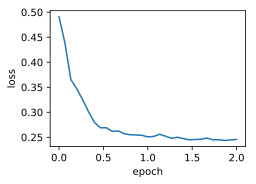

In [4]:
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.02, 'momentum': 0.5}, features, labels)

loss: 0.248168, 1.061918 sec per epoch


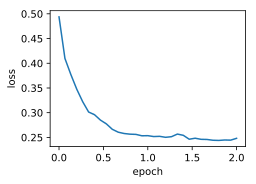

In [6]:
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.02, 'momentum': 0.9}, features, labels)

loss: 0.295256, 1.110202 sec per epoch


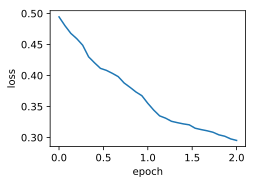

In [7]:
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.004, 'momentum': 0.9}, features, labels)

7.4.4. 简洁实现¶

In [10]:
from tensorflow.keras import optimizers
trainer = optimizers.SGD(learning_rate=0.004,momentum=0.9)

loss: 0.515107, 1.313495 sec per epoch


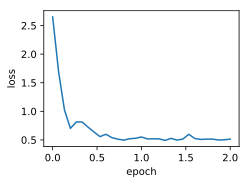

In [11]:
d2l.train_tensorflow2_ch7(trainer, {'lr': 0.004, 'momentum': 0.9},
                    features, labels)